In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
data1 = pd.read_excel('/content/drive/MyDrive/DATA/additional_data.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/DATA/customer_data.xlsx')
data3 = pd.read_excel('/content/drive/MyDrive/DATA/performance_data.xlsx')

In [78]:
data1.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [79]:
data2.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [80]:
data3.head()

,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [81]:
# Calculate the number of missing (null) values in each column of the dataframe 'data2'
missing_values = data2.isnull().sum()

# Print a heading to indicate the output
print('missing_values:')

# Display the result: the count of missing values for each column
missing_values

missing_values:


,0
CustomerID,0
Gender,0
Age,0
Income,5
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


In [82]:
# Import the SimpleImputer class from scikit-learn
# SimpleImputer is used to handle missing values by replacing them
# with a specified strategy (mean, median, most frequent, or constant).
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Create a SimpleImputer object with the strategy 'median'
# This means missing values will be replaced with the median of the column
imputer = SimpleImputer(strategy='median')#mean, median - use to numeric value

# Fit the imputer on the 'Income' column of the dataframe
# This calculates the median of 'Income' (ignoring missing values)
imputer.fit(data2[['Income']])

# Transform the 'Income' column using the fitted imputer
# All missing values in 'Income' will now be replaced with the calculated median
data2[['Income']] = imputer.transform(data2[['Income']])

In [84]:
missing_values = data2.isnull().sum()
print('missing_values:')
missing_values

missing_values:


,0
CustomerID,0
Gender,0
Age,0
Income,0
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


In [85]:
# Create a SimpleImputer object with the strategy 'most_frequent'
# This means missing values will be replaced with the most common (mode) value in the column
imputer = SimpleImputer(strategy='most_frequent')#most frequent,constant - use to numeric value

# Fit the imputer on the 'City' column of the dataframe
# This finds the most frequent city in the column (ignoring missing values)
imputer.fit(data2[['City']])

# Transform the 'City' column using the fitted imputer
# All missing values in 'City' will now be replaced with the most frequent city
data2[['City']] = imputer.transform(data2[['City']])

In [86]:
missing_values = data2.isnull().sum()
print('missing_values:')
missing_values

missing_values:


,0
CustomerID,0
Gender,0
Age,0
Income,0
City,0
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


In [87]:
data2.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [88]:
data2.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


In [89]:
# Get all the unique values from the 'Customer_Lifespan_Months' column
# This will return an array of distinct values (ignoring duplicates)
unique_value = data2['Customer_Lifespan_Months'].unique()

# Display the unique values
unique_value

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

In [90]:
# Remove rows where the column 'Customer_Lifespan_Months' has the value 'XXXX'
# (likely invalid or placeholder entries for missing lifespan data)
data2 = data2[data2['Customer_Lifespan_Months'] != 'XXXX']

# Display the first 5 rows of the cleaned dataframe to confirm the change
data2.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [91]:
data2['Customer_Lifespan_Months'].unique()

array([3, 4, 1, 2, 5], dtype=object)

In [92]:
data2.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


In [93]:
# Convert the 'Customer_Lifespan_Months' column from string (object) type to integer type
# This allows you to perform numerical calculations and statistical analysis on this column
data2['Customer_Lifespan_Months'] = data2['Customer_Lifespan_Months'].astype(int)

In [94]:
# Convert the 'Date_of_Purchase' column to datetime format
# This ensures that the column is treated as actual dates (instead of strings),
# allowing you to perform date-based operations like filtering, sorting, and calculating differences
data2['Date_of_Purchase'] = data2['Date_of_Purchase'].astype('datetime64[ns]')

In [95]:
data2.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,int64
Purchase_Channel,object


In [96]:
 data2.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [97]:
# Check for duplicate rows in the dataframe 'data2'
# This returns a boolean Series where True indicates a duplicate row
duplicates = data2.duplicated()

# Display all rows that are duplicates
data2[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


In [98]:
data2 = data2.drop_duplicates()#droup duplicates'.drop_duplicates(inplace=True)'

In [99]:
duplicates = data2.duplicated()
display(data2[duplicates])

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


In [100]:
# Sort the dataframe 'data2' by the 'Income' column in descending order
# ascending=False ensures the highest incomes appear first
sorted_data = data2.sort_values(by='Income', ascending=False)

# Display the first 5 rows of the sorted dataframe
sorted_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes


In [101]:
display(sorted_data.shape)

(79, 12)

In [102]:
 data2.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [103]:
data2.loc[0:4, 'CustomerID':'Region'] #.loc - select data coloms in 'CustomerID'to'Region'

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [104]:
data2.iloc[0:5,0:6]#.iloc - select data coloms in 'CustomerID'to'Region'

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [105]:
 data2.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [106]:
# Filter the dataframe 'data2' to include only rows where the 'Gender' column is 'Male'
male_data = data2[data2['Gender'] == 'Male']

# Display the filtered dataframe containing only male customers
male_data


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes


In [107]:
male_data1 = data2[(data2['Purchase_Channel'] == 'In-store') & (data2['Gender'] == 'Male')]

# Display the filtered dataframe containing only male customers who purchased in-store
display(male_data1)

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
21,C022,Male,26,78988.0,Chicago,Midwest,7,76.826,2,In-store,2023-12-24,No
24,C025,Male,27,45239.0,Los Angeles,West,12,127.888,3,In-store,2022-04-04,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
42,C043,Male,44,66344.0,Chicago,Midwest,12,130.562,3,In-store,2023-05-17,Yes
57,C058,Male,18,39995.0,Houston,West,7,81.111,2,In-store,2022-04-12,No
60,C061,Male,24,53080.0,Los Angeles,West,16,193.046,5,In-store,2022-07-28,Yes
63,C064,Male,30,58033.0,Houston,West,10,107.919,3,In-store,2023-11-16,Yes
72,C073,Male,28,73631.0,Los Angeles,West,9,90.344,2,In-store,2022-11-20,No


In [108]:
# Filter the 'male_data' dataframe to include only male customers
# who have made more than 5 purchases
male_Frequency_of_Purchases = male_data[male_data['Frequency_of_Purchases'] > 5]

# Display the filtered dataframe
male_Frequency_of_Purchases

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No


In [109]:
# Filter the 'data2' dataframe to include only rows where
# 'Customer_Lifespan_Months' is between 2 and 5 (inclusive)
filtered_data = data2[(data2['Customer_Lifespan_Months'] >= 2) &
                      (data2['Customer_Lifespan_Months'] <= 5)]

# Display the filtered dataframe
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,1.170120e+02,3,Online,2022-11-30,Yes
6,C007,Female,35,60349.0,Houston,Northeast,9,9.554400e+01,2,In-store,2023-07-20,No
7,C008,Male,38,38401.0,Houston,West,6,7.073000e+01,2,Online,2022-05-24,No
...,...,...,...,...,...,...,...,...,...,...,...,...
72,C073,Male,28,73631.0,Los Angeles,West,9,9.034400e+01,2,In-store,2022-11-20,No
75,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes


In [110]:
data3.head()

,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [111]:
# Merge two dataframes 'data2' and 'data3' using an inner join on the 'CustomerID' column
# 'inner' join means only rows with matching 'CustomerID' in both dataframes will be included
joined_data = pd.merge(data2, data3, on='CustomerID', how='inner')

# Display the first 5 rows of the merged dataframe
joined_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [112]:
joined_data.shape

(79, 15)

In [113]:
additional_data = data1
additional_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [114]:
# Concatenate the 'joined_data' and 'additional_data' dataframes vertically (stack rows)
# This combines all rows from both dataframes into a single dataframe
final_data = pd.concat([joined_data, additional_data])

# Display the shape of the resulting dataframe (number of rows and columns)
display(final_data.shape)

# Display the first 5 rows of the final concatenated dataframe
final_data.head()

(99, 16)

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,NaN
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,NaN
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,NaN
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,NaN
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,NaN


In [115]:
final_data.tail()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
15,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
16,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
17,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
18,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
19,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


In [116]:
# Concatenate 'joined_data' and 'additional_data' dataframes vertically (stack rows)
# Then reset the index of the resulting dataframe and drop the old index
# This ensures the row numbers are sequential from 0 to n-1
final_data = pd.concat([joined_data, additional_data]).reset_index(drop=True)

# Display the shape of the final dataframe (number of rows and columns)
display(final_data.shape)

# Display the first 5 rows of the final dataframe
final_data.head()

(99, 16)

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,NaN
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,NaN
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,NaN
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,NaN
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,NaN


In [117]:
# Drop the column 'CustomerID.1' from the 'final_data' dataframe
# axis=1 indicates that we are removing a column (not a row)
final_data = final_data.drop('CustomerID.1', axis=1)

# Display the first 5 rows of the dataframe after dropping the column
display(final_data.head())

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


In [118]:
# Count the frequency of each unique value in the "Purchase_Channel" column
# of the dataframe 'final_data' and store the result in 'freq_purchase_channel'.
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()

# Display the frequency counts of purchase channels
freq_purchase_channel

,count
Purchase_Channel,
Online,65
In-store,34


In [119]:
len(final_data['Purchase_Channel'])

99

In [120]:
# Convert the frequency counts of purchase channels into percentages.
# Divide each count in 'freq_purchase_channel' by the total number of records
# in the 'Purchase_Channel' column, then multiply by 100 to get percentages.
freq_purchase_channel = freq_purchase_channel / len(final_data['Purchase_Channel']) * 100

# Display the percentage distribution of purchase channels
freq_purchase_channel

,count
Purchase_Channel,
Online,65.656566
In-store,34.343434


In [121]:
final_data.describe()

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000
mean,35.101010,58115.202020,9.444444,1.356871e+05,2.545455,2.646465,2.595960,2.515152
std,9.825513,18617.672182,3.252071,1.349094e+06,1.012904,1.145650,1.115011,1.119071
min,17.000000,15531.000000,1.000000,3.697500e+01,0.000000,1.000000,1.000000,1.000000
25%,28.000000,45724.000000,7.000000,7.647000e+01,2.000000,2.000000,2.000000,2.000000
50%,35.000000,58033.000000,10.000000,9.778200e+01,3.000000,3.000000,3.000000,3.000000
75%,42.000000,71484.500000,12.000000,1.206160e+02,3.000000,4.000000,4.000000,3.500000
max,54.000000,107662.000000,16.000000,1.342341e+07,5.000000,4.000000,4.000000,4.000000


In [122]:
round(final_data.describe(),2)

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,35.10,58115.20,9.44,135687.08,2.55,2.65,2.60,2.52
std,9.83,18617.67,3.25,1349093.81,1.01,1.15,1.12,1.12
min,17.00,15531.00,1.00,36.98,0.00,1.00,1.00,1.00
25%,28.00,45724.00,7.00,76.47,2.00,2.00,2.00,2.00
50%,35.00,58033.00,10.00,97.78,3.00,3.00,3.00,3.00
75%,42.00,71484.50,12.00,120.62,3.00,4.00,4.00,3.50
max,54.00,107662.00,16.00,13423411.96,5.00,4.00,4.00,4.00


In [123]:
max(final_data['Average_Purchase_Amount'])

13423411.958

In [124]:
# The value 13423412.0 (≈ 13423411.958) is considered an inconsistent/outlier value
# in the column "Average_Purchase_Amount".
# To clean the dataset, we remove rows where "Average_Purchase_Amount"
# is equal to 13423411.958.

final_data = final_data[final_data['Average_Purchase_Amount'] != 13423411.958]

In [125]:
max(final_data['Average_Purchase_Amount'])

193.046

In [126]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,35.0,58131.0,9.0,98.0,3.0,3.0,3.0,3.0
std,10.0,18713.0,3.0,29.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45482.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0
75%,42.0,71994.0,12.0,120.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,193.0,5.0,4.0,4.0,4.0


In [127]:
# Group the dataset 'final_data' by the 'City' column.
# For each city, calculate the median value of 'Average_Purchase_Amount'.
# The result will be a Series with cities as the index and median purchase amounts as the values.
city_Purchase_Amount = final_data.groupby('City')['Average_Purchase_Amount'].median()

# Display the median purchase amount for each city
city_Purchase_Amount

,Average_Purchase_Amount
City,
Chicago,102.1860
Houston,87.6615
Los Angeles,100.7250
New York,94.4690


In [128]:
#pivot table
pivot_table0 =final_data.pivot_table(index='Churn_Status',
                                    values=['Recency',	'Frequency_Score',	'Monetary_Score'],
                                    aggfunc='mean')
pivot_table0

,Frequency_Score,Monetary_Score,Recency
Churn_Status,,,
No,2.744186,2.558140,2.720930
Yes,2.509091,2.509091,2.618182


In [129]:
#pivot table
# Create a pivot table from the dataframe 'final_data'
# - 'Churn_Status' is used as the row index (groups data by churned / not churned customers).
# - The values to summarize are: 'Recency', 'Frequency_Score', and 'Monetary_Score'.
# - The aggregation function (aggfunc) is set to 'mean' for each column,
#   so it will calculate the average Recency, Frequency_Score, and Monetary_Score
#   for each Churn_Status group.

pivot_table = final_data.pivot_table(
    index='Churn_Status',
    values=['Recency', 'Frequency_Score', 'Monetary_Score'],
    aggfunc={'Recency': 'mean', 'Frequency_Score': 'mean', 'Monetary_Score': 'mean','Churn_Status':'count'})

# Display the pivot table: average RFM values grouped by churn status
pivot_table

,Churn_Status,Frequency_Score,Monetary_Score,Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


In [130]:
pivot_table = pivot_table.rename(columns={'Churn_Status':'freq_Churn_Status',
                                          'Recency':'freq_Recency',
                                          'Frequency_Score':'freq_Frequency_Score',
                                          'Monetary_Score':'freq_Monetary_Score'})
pivot_table

,freq_Churn_Status,freq_Frequency_Score,freq_Monetary_Score,freq_Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


In [131]:
#relationship between two or more categorical variables.
cross_tab = pd.crosstab(final_data['City'], final_data['Purchase_Channel'])
cross_tab

Purchase_Channel,In-store,Online
City,,
Chicago,8,17
Houston,11,21
Los Angeles,9,15
New York,5,12


In [132]:
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()
freq_purchase_channel

,count
Purchase_Channel,
Online,65
In-store,33


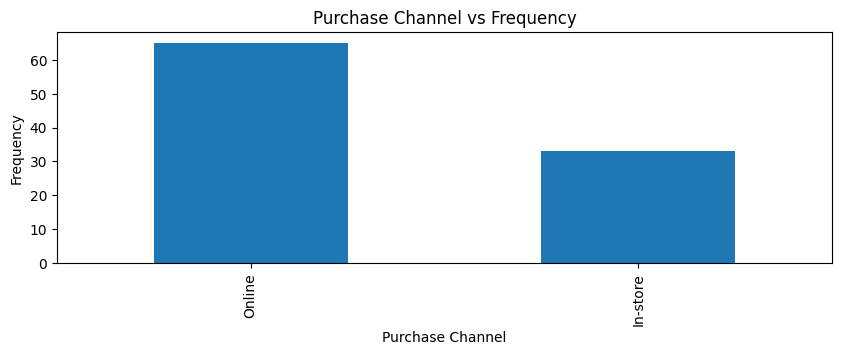

In [133]:
# Set the figure size to 10 (width) x 3 (height) inches
plt.figure(figsize=(10, 3))

# Plot the purchase channel frequencies as a bar chart
# 'freq_purchase_channel' is a Series with channels as index and their frequency/percentage as values
freq_purchase_channel.plot(kind='bar')

# Add a title to the chart
plt.title('Purchase Channel vs Frequency')

# Label the X-axis (purchase channel names)
plt.xlabel('Purchase Channel')

# Label the Y-axis (frequency or percentage depending on how freq_purchase_channel was calculated)
plt.ylabel('Frequency')

# Display the plot
plt.show()

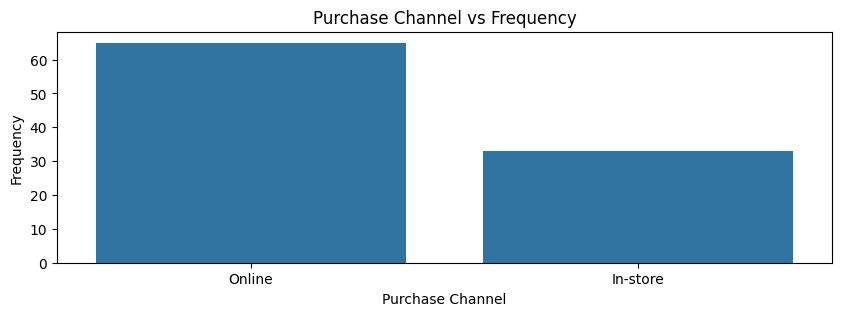

In [134]:
# Set the figure size to 10 (width) x 3 (height) inches
plt.figure(figsize=(10, 3))

# Create a countplot using Seaborn
# - 'data=final_data' specifies the dataset
# - 'x="Purchase_Channel"' means bars will represent the frequency of each purchase channel
sns.countplot(data=final_data, x='Purchase_Channel')

# Add a title to the chart
plt.title('Purchase Channel vs Frequency')

# Label the X-axis (purchase channel names)
plt.xlabel('Purchase Channel')

# Label the Y-axis (number of occurrences of each channel)
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [135]:
#relationship between two or more categorical variables.
cross_tab = pd.crosstab(final_data['City'], final_data['Churn_Status'])
cross_tab

Churn_Status,No,Yes
City,,
Chicago,8,17
Houston,16,16
Los Angeles,10,14
New York,9,8


<Figure size 1000x300 with 0 Axes>

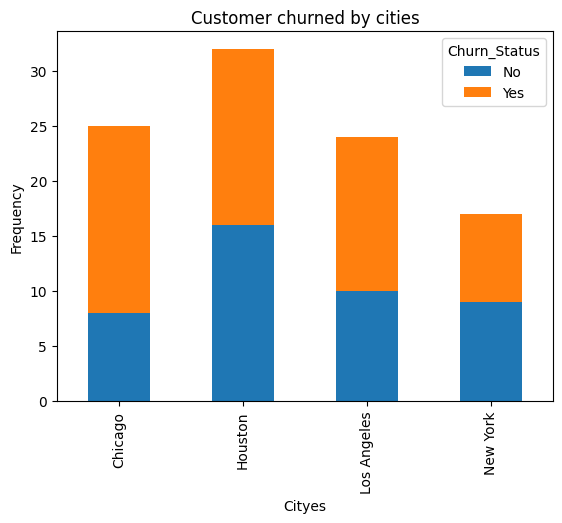

In [136]:
plt.figure(figsize=(10, 3))
cross_tab.plot(kind='bar', stacked=True)#false
plt.title('Customer churned by cities')
plt.xlabel('Cityes')
plt.ylabel('Frequency')
plt.show()

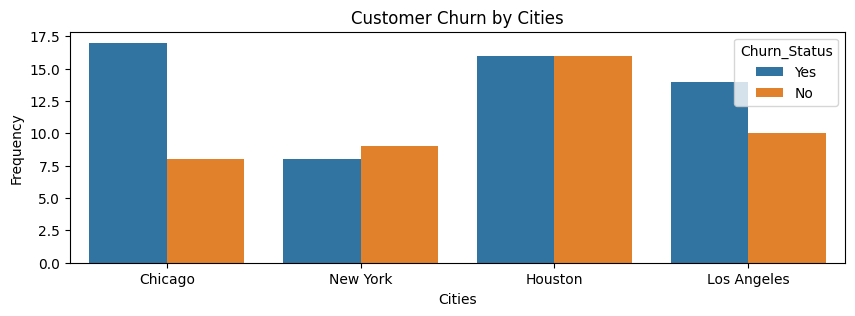

In [137]:
# Set the figure size to 10 (width) x 3 (height) inches
plt.figure(figsize=(10, 3))
# Create a grouped countplot with Seaborn
# - 'data=final_data' specifies the dataset
# - 'x="City"' means cities will be shown on the X-axis
# - 'hue="Churn_Status"' separates bars within each city by churn status
#    (e.g., churned vs not churned customers)
sns.countplot(data=final_data, x='City', hue='Churn_Status')
# Add a title to the chart
plt.title('Customer Churn by Cities')
# Label the X-axis (city names)
plt.xlabel('Cities')
# Label the Y-axis (number of customers)
plt.ylabel('Frequency')
# Display the plot
plt.show()

In [138]:
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()
print(freq_purchase_channel)
print('______________________________________________________________________________________________________')
freq_purchase_channel = freq_purchase_channel / len(final_data['Purchase_Channel']) * 100
print(freq_purchase_channel)

Purchase_Channel
Online      65
In-store    33
Name: count, dtype: int64
______________________________________________________________________________________________________
Purchase_Channel
Online      66.326531
In-store    33.673469
Name: count, dtype: float64


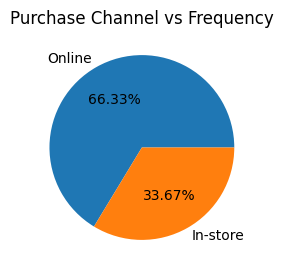

In [139]:
plt.figure(figsize=(10, 3))
freq_purchase_channel.plot(kind='pie',autopct='%1.2f%%')
plt.title('Purchase Channel vs Frequency')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [140]:
city_Purchase_Amount = final_data.groupby('City')['Average_Purchase_Amount'].median()
city_Purchase_Amount

,Average_Purchase_Amount
City,
Chicago,102.1860
Houston,87.6615
Los Angeles,100.7250
New York,94.4690


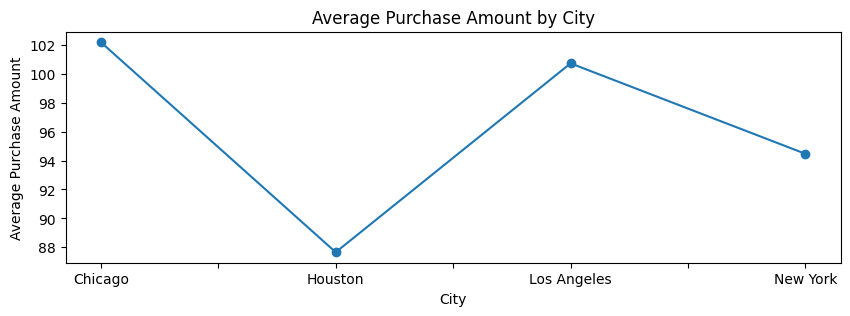

In [141]:
plt.figure(figsize=(10, 3))
city_Purchase_Amount.plot(kind='line', marker='o')
plt.title('Average Purchase Amount by City')
plt.xlabel('City')
plt.ylabel('Average Purchase Amount')
plt.show()

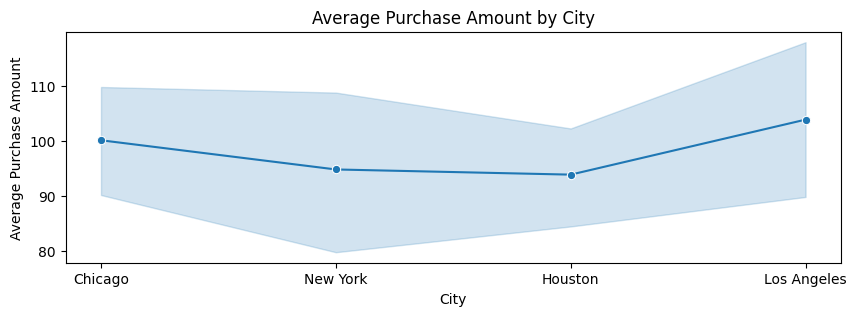

In [142]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=final_data, x='City', y='Average_Purchase_Amount',marker='o')
plt.title('Average Purchase Amount by City')
plt.xlabel('City')
plt.ylabel('Average Purchase Amount')
plt.show()

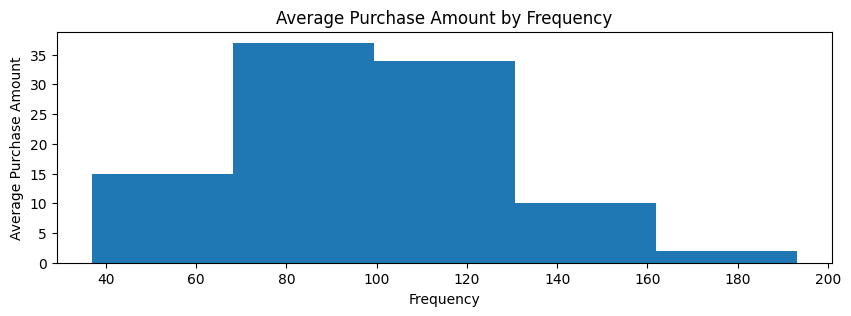

In [143]:
plt.figure(figsize=(10, 3))
final_data['Average_Purchase_Amount'].plot(kind='hist', bins=5)
plt.title('Average Purchase Amount by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Average Purchase Amount')
plt.show()

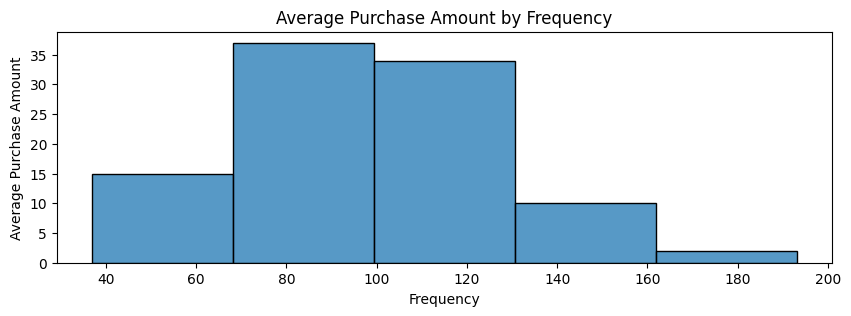

In [144]:
plt.figure(figsize=(10, 3))
sns.histplot(data=final_data, x='Average_Purchase_Amount', bins=5)
plt.title('Average Purchase Amount by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Average Purchase Amount')
plt.show()

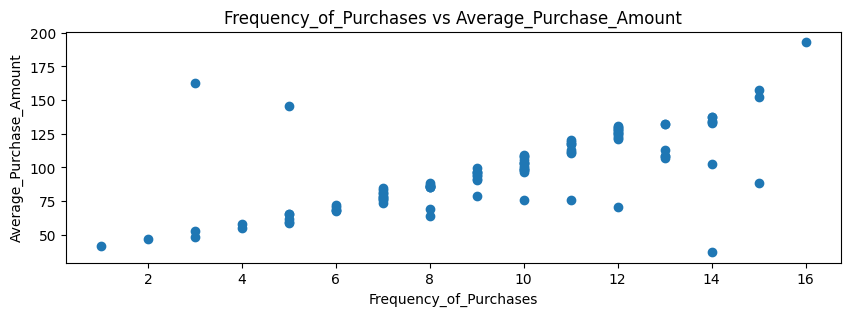

In [145]:
plt.figure(figsize=(10, 3))
plt.scatter(final_data['Frequency_of_Purchases'], final_data['Average_Purchase_Amount'])
plt.title('Frequency_of_Purchases vs Average_Purchase_Amount')
plt.xlabel('Frequency_of_Purchases')
plt.ylabel('Average_Purchase_Amount')
plt.show()

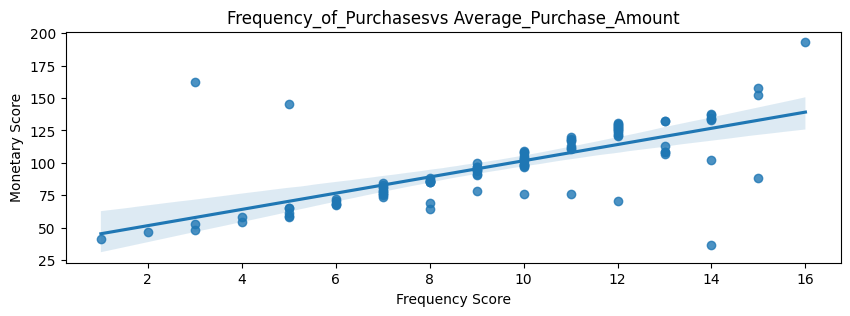

In [146]:
plt.figure(figsize=(10, 3))
#sns.scatterplot(data=final_data, x='Frequency_of_Purchases' ,y='Average_Purchase_Amount')
sns.regplot(data=final_data, x='Frequency_of_Purchases' ,y='Average_Purchase_Amount')
plt.title('Frequency_of_Purchasesvs Average_Purchase_Amount')
plt.xlabel('Frequency Score')
plt.ylabel('Monetary Score')
plt.show()

In [147]:
# Select only the numerical columns (both float and integer types) from the dataframe
num_variables = final_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the selected numerical columns
# - 'corr()' computes pairwise correlation between columns
# - 'round(..., 3)' rounds the correlation values to 3 decimal places for easier reading
correl = round(final_data[num_variables].corr(), 3)

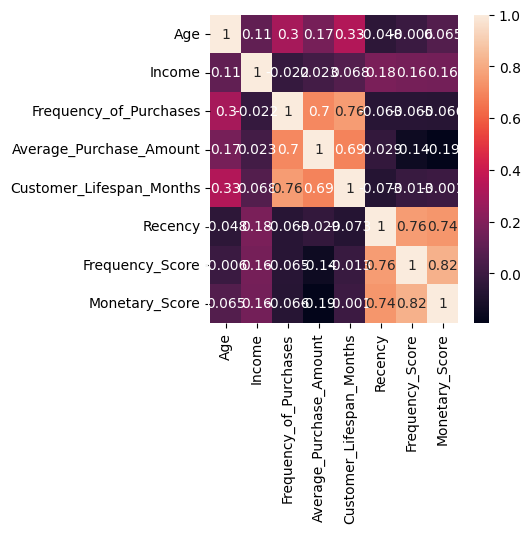

In [148]:
plt.figure(figsize=(4,4))
sns.heatmap(data=correl, annot=True)
plt.show()

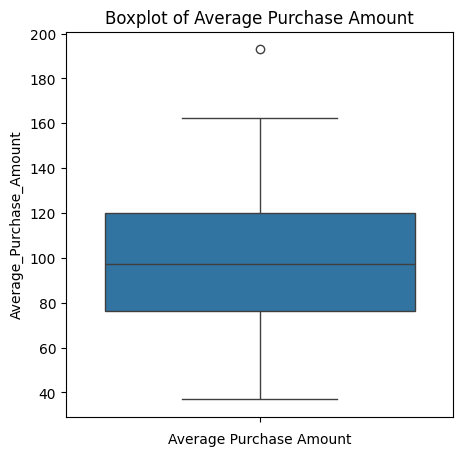

In [149]:
plt.figure(figsize=(5,5))
sns.boxplot(data=final_data, y='Average_Purchase_Amount')
plt.title('Boxplot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()

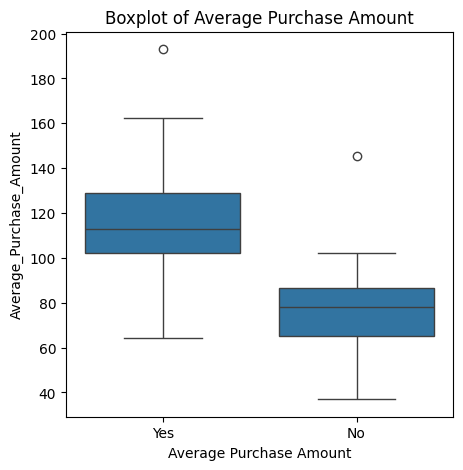

In [150]:
plt.figure(figsize=(5,5))
sns.boxplot(data=final_data, y='Average_Purchase_Amount', x='Churn_Status')
plt.title('Boxplot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()